In [8]:
import numpy as np

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

<b>Loading Sample Images</b>

Cardboard

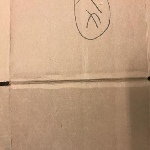

In [41]:
path = './Garbage classification/train/cardboard'
name = 'cardboard1.jpg'
fullname = f'{path}/{name}'
load_img(fullname, target_size=(150, 150))

Glass

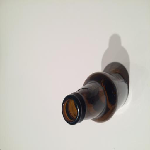

In [3]:
path = './Garbage classification/train/glass'
name = 'glass1.jpg'
fullname = f'{path}/{name}'
load_img(fullname, target_size=(150, 150))

Metal

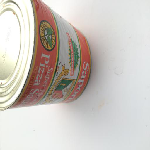

In [4]:
path = './Garbage classification/train/metal'
name = 'metal1.jpg'
fullname = f'{path}/{name}'
load_img(fullname, target_size=(150, 150))

Paper

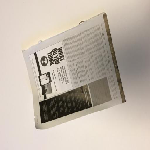

In [5]:
path = './Garbage classification/train/paper'
name = 'paper1.jpg'
fullname = f'{path}/{name}'
load_img(fullname, target_size=(150, 150))

Plastic

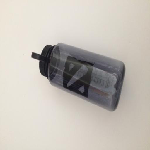

In [6]:
path = './Garbage classification/train/plastic'
name = 'plastic1.jpg'
fullname = f'{path}/{name}'
load_img(fullname, target_size=(150, 150))

Trash

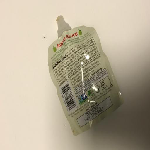

In [7]:
path = './Garbage classification/train/trash'
name = 'trash1.jpg'
fullname = f'{path}/{name}'
load_img(fullname, target_size=(150, 150))

<h1><b>Test Xception pre-trained model on imagenet dataset with top and bottom layers</b></h1>

In [10]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [9]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2022-01-20 17:00:36.347693: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-20 17:00:36.357173: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-20 17:00:36.387420: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
path = './Garbage classification/train/cardboard'
name = 'cardboard1.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299, 299))
x = np.array(img)

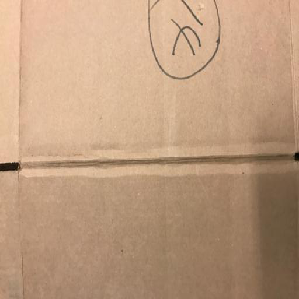

In [18]:
load_img(fullname, target_size=(299, 299))

In [19]:
x.shape

(299, 299, 3)

In [14]:
X = np.array([x])
X = preprocess_input(X)

In [15]:
preds = model.predict(X)

2022-01-20 17:02:34.341208: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-20 17:02:34.407067: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3065950000 Hz


In [16]:
preds.shape

(1, 1000)

In [17]:
decode_predictions(preds)

[[('n02971356', 'carton', 0.76300013),
  ('n03666591', 'lighter', 0.04582926),
  ('n03291819', 'envelope', 0.014132096),
  ('n15075141', 'toilet_tissue', 0.01020615),
  ('n02808304', 'bath_towel', 0.0084517235)]]

It detect is a cardboard image

<h1><b>Model Training using imagenet dataset without top layer</b></h1>

Prepare Dataset

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [22]:
train_ds = train_gen.flow_from_directory('./Garbage classification/train/',target_size=(150, 150), batch_size=32)

Found 2019 images belonging to 6 classes.


In [23]:
train_ds.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [24]:
val_ds = val_gen.flow_from_directory('./Garbage classification/validation',target_size=(150, 150), batch_size=32, shuffle=False)

Found 508 images belonging to 6 classes.


In [25]:
val_ds.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

<b>First run with only 1 dense layer</b>

In [14]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

2022-01-12 09:26:28.961419: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-12 09:26:28.968053: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-12 09:26:28.988493: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(6)(vectors)

model = keras.Model(inputs, outputs)

In [16]:
preds = model.predict(X)

2022-01-12 09:26:41.343516: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-12 09:26:41.435795: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3065950000 Hz


In [17]:
preds.shape

(1, 6)

In [18]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [19]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [20]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
64/64 [==============================] - 389s 6s/step - loss: 1.3928 - accuracy: 0.6021 - val_loss: 1.1652 - val_accuracy: 0.7461
Epoch 2/10
64/64 [==============================] - 387s 6s/step - loss: 0.4108 - accuracy: 0.8733 - val_loss: 0.9766 - val_accuracy: 0.7756
Epoch 3/10
64/64 [==============================] - 411s 6s/step - loss: 0.1916 - accuracy: 0.9209 - val_loss: 1.0284 - val_accuracy: 0.7461
Epoch 4/10
64/64 [==============================] - 400s 6s/step - loss: 0.1498 - accuracy: 0.9470 - val_loss: 1.1397 - val_accuracy: 0.7776
Epoch 5/10
64/64 [==============================] - 434s 7s/step - loss: 0.1597 - accuracy: 0.9450 - val_loss: 1.0532 - val_accuracy: 0.8051
Epoch 6/10
64/64 [==============================] - 499s 8s/step - loss: 0.0596 - accuracy: 0.9802 - val_loss: 1.0781 - val_accuracy: 0.7933
Epoch 7/10
64/64 [==============================] - 764s 12s/step - loss: 0.0312 - accuracy: 0.9944 - val_loss: 1.1202 - val_accuracy: 0.8051
Epoch 8/10
6

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

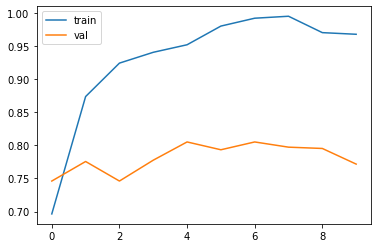

In [22]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()

<b>Tuning Learning Rate</b>

In [23]:
def make_model(learning_rate=0.01):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = False
    
    ##############################################
    
    inputs = keras.Input(shape=(150, 150, 3))

    base = base_model(inputs, training=False)

    vectors = keras.layers.GlobalAveragePooling2D()(base)

    outputs = keras.layers.Dense(6)(vectors)

    model = keras.Model(inputs, outputs)
    
    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [24]:
scores={}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10
64/64 [==============================] - 372s 6s/step - loss: 1.6797 - accuracy: 0.3089 - val_loss: 1.3409 - val_accuracy: 0.5335
Epoch 2/10
64/64 [==============================] - 421s 7s/step - loss: 1.2785 - accuracy: 0.5452 - val_loss: 1.1130 - val_accuracy: 0.6417
Epoch 3/10
64/64 [==============================] - 442s 7s/step - loss: 1.0378 - accuracy: 0.6567 - val_loss: 0.9859 - val_accuracy: 0.6850
Epoch 4/10
64/64 [==============================] - 409s 6s/step - loss: 0.8798 - accuracy: 0.7219 - val_loss: 0.9049 - val_accuracy: 0.7047
Epoch 5/10
64/64 [==============================] - 383s 6s/step - loss: 0.7980 - accuracy: 0.7365 - val_loss: 0.8509 - val_accuracy: 0.7264
Epoch 6/10
64/64 [==============================] - 448s 7s/step - loss: 0.7333 - accuracy: 0.7590 - val_loss: 0.8109 - val_accuracy: 0.7244
Epoch 7/10
64/64 [==============================] - 399s 6s/step - loss: 0.6680 - accuracy: 0.7864 - val_loss: 0.7831 - val_accuracy: 0.7461
Epoch 

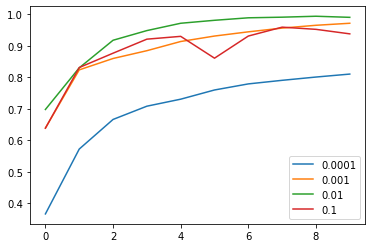

In [25]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=lr)
    
plt.legend()

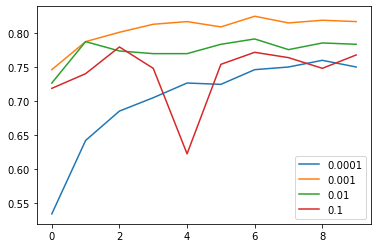

In [26]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)
    
plt.legend()

<b>BEST LEARNING RATE = 0.001</b>

In [28]:
learning_rate = 0.001

<b>ADDING a NEW INNER DENSE LAYER and Tuning the parameter</b>

In [30]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = False
    
    ##############################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(6)(inner)
    model = keras.Model(inputs, outputs)
    
    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy']
    )
    
    return model

In [31]:
learning_rate = 0.001

scores={}

for size in [10, 100, 1000]:
    print(size)
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()

10
Epoch 1/10
64/64 [==============================] - 420s 7s/step - loss: 1.3402 - accuracy: 0.4607 - val_loss: 0.8402 - val_accuracy: 0.7146
Epoch 2/10
64/64 [==============================] - 489s 8s/step - loss: 0.5800 - accuracy: 0.7925 - val_loss: 0.7382 - val_accuracy: 0.7421
Epoch 3/10
64/64 [==============================] - 455s 7s/step - loss: 0.4609 - accuracy: 0.8440 - val_loss: 0.7144 - val_accuracy: 0.7657
Epoch 4/10
64/64 [==============================] - 396s 6s/step - loss: 0.3522 - accuracy: 0.8996 - val_loss: 0.6998 - val_accuracy: 0.7657
Epoch 5/10
64/64 [==============================] - 434s 7s/step - loss: 0.2903 - accuracy: 0.9159 - val_loss: 0.6972 - val_accuracy: 0.7854
Epoch 6/10
64/64 [==============================] - 390s 6s/step - loss: 0.2425 - accuracy: 0.9329 - val_loss: 0.7035 - val_accuracy: 0.7795
Epoch 7/10
64/64 [==============================] - 415s 7s/step - loss: 0.2013 - accuracy: 0.9398 - val_loss: 0.7327 - val_accuracy: 0.7835
Epoch 8/10

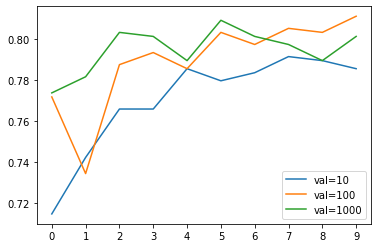

In [32]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

<b>val_accuracy: 0.8110 with Inner Layer Dense 100</b>

<b>DROPOUT REGULARIZATION</b>

In [5]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = False
    
    ##############################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(6)(drop)
    model = keras.Model(inputs, outputs)
    
    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy']
    )
    
    return model

In [15]:
learning_rate = 0.001
size = 100

scores={}

for droprate in [0.0, 0.2, 0.5]:
    print(droprate)
    model = make_model(learning_rate=learning_rate, size_inner=size, droprate=droprate)
    history = model.fit(train_ds, epochs=20, validation_data=val_ds)
    scores[droprate] = history.history
    
    print()
    print()

0.0


2022-01-13 10:52:33.005384: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-13 10:52:33.005743: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-13 10:52:33.026432: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-01-13 10:52:36.333158: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-13 10:52:36.334016: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3065950000 Hz


Epoch 1/20
64/64 [==============================] - 360s 6s/step - loss: 1.0150 - accuracy: 0.6128 - val_loss: 0.6946 - val_accuracy: 0.7638
Epoch 2/20
64/64 [==============================] - 477s 8s/step - loss: 0.3462 - accuracy: 0.8787 - val_loss: 0.6764 - val_accuracy: 0.7933
Epoch 3/20
64/64 [==============================] - 388s 6s/step - loss: 0.1984 - accuracy: 0.9431 - val_loss: 0.6863 - val_accuracy: 0.7913
Epoch 4/20
64/64 [==============================] - 355s 6s/step - loss: 0.1283 - accuracy: 0.9666 - val_loss: 0.7630 - val_accuracy: 0.7992
Epoch 5/20
64/64 [==============================] - 448s 7s/step - loss: 0.0812 - accuracy: 0.9877 - val_loss: 0.7910 - val_accuracy: 0.7972
Epoch 6/20
64/64 [==============================] - 400s 6s/step - loss: 0.0489 - accuracy: 0.9946 - val_loss: 0.7870 - val_accuracy: 0.7992
Epoch 7/20
64/64 [==============================] - 389s 6s/step - loss: 0.0394 - accuracy: 0.9967 - val_loss: 0.8035 - val_accuracy: 0.8051
Epoch 8/20
64

Epoch 19/20
64/64 [==============================] - 445s 7s/step - loss: 0.0657 - accuracy: 0.9812 - val_loss: 0.8826 - val_accuracy: 0.8091
Epoch 20/20
64/64 [==============================] - 366s 6s/step - loss: 0.0627 - accuracy: 0.9844 - val_loss: 0.9276 - val_accuracy: 0.7992




In [ ]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.legend()

<b>val_accuracy: 0.8248 for DROP RATE= 0.2 (20%)</b>

<b>Some test with data augmentation</b>

In [80]:
#train_gen = ImageDataGenerator(
    #preprocessing_function=preprocess_input,
    #rescale=1./255,
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #vertical_flip=True,
    #fill_mode='nearest'
#)

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

train_ds = train_gen.flow_from_directory('./Garbage classification/train/',target_size=(150, 150), batch_size=32)

val_gen = ImageDataGenerator(rescale=1./255)

val_ds = val_gen.flow_from_directory('./Garbage classification/validation',target_size=(150, 150), batch_size=32, shuffle=False)


Found 2019 images belonging to 6 classes.
Found 508 images belonging to 6 classes.


In [81]:

checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [82]:
learning_rate = 0.001
size = 100
droprate = 0.2


model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/20
64/64 [==============================] - 353s 5s/step - loss: 1.1689 - accuracy: 0.5357 - val_loss: 0.7774 - val_accuracy: 0.7461
Epoch 2/20
64/64 [==============================] - 355s 6s/step - loss: 0.6116 - accuracy: 0.7825 - val_loss: 0.7452 - val_accuracy: 0.7480
Epoch 3/20
64/64 [==============================] - 361s 6s/step - loss: 0.5591 - accuracy: 0.7986 - val_loss: 0.7343 - val_accuracy: 0.7579
Epoch 4/20
64/64 [==============================] - 385s 6s/step - loss: 0.5422 - accuracy: 0.7989 - val_loss: 0.7522 - val_accuracy: 0.7736
Epoch 5/20
64/64 [==============================] - 374s 6s/step - loss: 0.4470 - accuracy: 0.8415 - val_loss: 0.7239 - val_accuracy: 0.7776
Epoch 6/20
64/64 [==============================] - 399s 6s/step - loss: 0.4380 - accuracy: 0.8279 - val_loss: 0.7303 - val_accuracy: 0.7972
Epoch 7/20
64/64 [==============================] - 372s 6s/step - loss: 0.4142 - accuracy: 0.8379 - val_loss: 0.7077 - val_accuracy: 0.7776
Epoch 8/20
64

After some tries with the parameters No Improvements with augmentation, even worst

Try another last run with these parameters and increase the epoch

In [29]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

train_ds = train_gen.flow_from_directory('./Garbage classification/train/',target_size=(150, 150), batch_size=32)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('./Garbage classification/validation',target_size=(150, 150), batch_size=32, shuffle=False)


Found 2019 images belonging to 6 classes.
Found 508 images belonging to 6 classes.


In [7]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [8]:
learning_rate = 0.001
size = 100
droprate = 0.2


model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[checkpoint])

2022-01-15 09:38:55.901283: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-15 09:38:55.910720: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-15 09:38:55.940895: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-01-15 09:39:01.179968: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-15 09:39:01.209459: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3065950000 Hz


Epoch 1/50
64/64 [==============================] - 386s 6s/step - loss: 1.1720 - accuracy: 0.5622 - val_loss: 0.7188 - val_accuracy: 0.7421
Epoch 2/50
64/64 [==============================] - 464s 7s/step - loss: 0.6495 - accuracy: 0.7597 - val_loss: 0.6619 - val_accuracy: 0.7677
Epoch 3/50
64/64 [==============================] - 358s 6s/step - loss: 0.5213 - accuracy: 0.8082 - val_loss: 0.6925 - val_accuracy: 0.7776
Epoch 4/50
64/64 [==============================] - 370s 6s/step - loss: 0.4714 - accuracy: 0.8338 - val_loss: 0.6789 - val_accuracy: 0.7539
Epoch 5/50
64/64 [==============================] - 464s 7s/step - loss: 0.4468 - accuracy: 0.8328 - val_loss: 0.6783 - val_accuracy: 0.7677
Epoch 6/50
64/64 [==============================] - 384s 6s/step - loss: 0.4226 - accuracy: 0.8508 - val_loss: 0.7029 - val_accuracy: 0.7874
Epoch 7/50
64/64 [==============================] - 477s 7s/step - loss: 0.3781 - accuracy: 0.8571 - val_loss: 0.6896 - val_accuracy: 0.7736
Epoch 8/50
64

<b>Best result val_accuracy: 0.8189 at 48 epoch, no improvement at all. I think augmentation doesn't improve the model accuracy</b>

<b>I want to try a final test without augmentation, only dropout but do the train for more epoch</b>

In [6]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = False
    
    ##############################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(6)(drop)
    model = keras.Model(inputs, outputs)
    
    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy']
    )
    
    return model

In [5]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_ds = train_gen.flow_from_directory('./Garbage classification/train/',target_size=(150, 150), batch_size=32)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('./Garbage classification/validation',target_size=(150, 150), batch_size=32, shuffle=False)


Found 2019 images belonging to 6 classes.
Found 508 images belonging to 6 classes.


In [8]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [9]:
learning_rate = 0.001
size = 100
droprate = 0.2


model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[checkpoint])

2022-01-16 09:46:40.552186: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-16 09:46:40.561688: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-16 09:46:40.591665: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-01-16 09:46:44.989677: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-16 09:46:45.010438: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3065950000 Hz


Epoch 1/50
64/64 [==============================] - 410s 6s/step - loss: 1.2743 - accuracy: 0.5458 - val_loss: 0.6936 - val_accuracy: 0.7618
Epoch 2/50
64/64 [==============================] - 642s 10s/step - loss: 0.5295 - accuracy: 0.8183 - val_loss: 0.6376 - val_accuracy: 0.8130
Epoch 3/50
64/64 [==============================] - 538s 8s/step - loss: 0.3309 - accuracy: 0.8909 - val_loss: 0.7010 - val_accuracy: 0.7972
Epoch 4/50
64/64 [==============================] - 458s 7s/step - loss: 0.2482 - accuracy: 0.9171 - val_loss: 0.6254 - val_accuracy: 0.8091
Epoch 5/50
64/64 [==============================] - 603s 9s/step - loss: 0.1687 - accuracy: 0.9519 - val_loss: 0.7392 - val_accuracy: 0.8012
Epoch 6/50
64/64 [==============================] - 524s 8s/step - loss: 0.1482 - accuracy: 0.9612 - val_loss: 0.7019 - val_accuracy: 0.8209
Epoch 7/50
64/64 [==============================] - 658s 10s/step - loss: 0.0991 - accuracy: 0.9683 - val_loss: 0.6975 - val_accuracy: 0.8209
Epoch 8/50


I chose this one:
Epoch 6/50
64/64 [==============================] - 524s 8s/step - loss: 0.1482 - accuracy: 0.9612 - val_loss: 0.7019 - val_accuracy: 0.8209

<b>There is a 82.7 accuracy model but the train accuracy and val_loss is higher</b>

<h1><b>Load final model from saved .h5 file and covert to TFlite</b></h1>

In [5]:
model = keras.models.load_model('./xception_v2_06_0.821.h5')

2022-01-17 11:17:54.321659: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-17 11:17:54.330943: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-17 11:17:54.361179: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('garbage-classification-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

2022-01-17 11:18:21.435312: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpt6mbckpa/assets


2022-01-17 11:18:41.930819: I tensorflow/core/grappler/devices.cc:78] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-01-17 11:18:41.931437: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2022-01-17 11:18:41.932415: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3065950000 Hz
2022-01-17 11:18:41.963129: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:928] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 5.639ms.
  function_optimizer: function_optimizer did nothing. time = 0ms.

2022-01-17 11:18:45.979408: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:316] Ignored output_format.
2022-01-17 11:18:45.979498: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:319] Ignored drop_control_dependency.
2022-01-17 11:18:46.676194: I 

In [16]:
!pip install keras-image-helper

  Using cached keras_image_helper-0.0.1-py3-none-any.whl (4.6 kB)


In [14]:
!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/
     |████████████████████████████████| 2.2 MB 1.4 MB/s eta 0:00:01     |█████▋                          | 389 kB 1.3 MB/s eta 0:00:02


In [31]:
import tflite_runtime.interpreter as tflite
from keras_image_helper import create_preprocessor

In [25]:
interpreter = tflite.Interpreter(model_path='garbage-classification-model.tflite')
interpreter.allocate_tensors() # Weights

In [26]:
interpreter.get_input_details()

[{'name': 'input_2',
  'index': 0,
  'shape': array([  1, 150, 150,   3], dtype=int32),
  'shape_signature': array([ -1, 150, 150,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [27]:
interpreter.get_output_details()

[{'name': 'Identity',
  'index': 229,
  'shape': array([1, 6], dtype=int32),
  'shape_signature': array([-1,  6], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [28]:
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

<b>Perform some test using images from google</b>

In [77]:
preprocessor = create_preprocessor('xception', target_size=(150, 150))
url = 'https://images.kkeu.de/is/image/BEG/Packaging_Supplies/Cardboard_boxes/Folding_cardboard_box_FEFCO_0201_pdplarge-mrd--000026508745_PRD_org_all.jpg'
#url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJm0EULF8I8upx-gcOQQ6OgEMb0Wy5q3pc7g&usqp=CAU'
#url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSXiQMh90X7I5lRslSReaFY0RCvGU-jMPAnsA&usqp=CAU'


In [78]:
from PIL import Image
from urllib.request import urlopen
from io import BytesIO

In [79]:
with urlopen(url) as resp:
    buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)

In [80]:
img = img.resize((150, 150), Image.NEAREST)

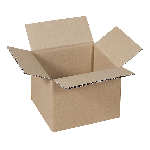

In [81]:
img

In [82]:
X = preprocessor.from_url(url)

In [83]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [84]:
classes = ['cardboard',
 'glass',
 'metal',
 'paper',
 'plastic',
 'trash'
]

In [85]:
dict(zip(classes, preds[0]))

{'cardboard': 10.467004,
 'glass': -5.1123157,
 'metal': -3.053933,
 'paper': 1.9303674,
 'plastic': -4.079299,
 'trash': 0.38328198}

In [86]:
preprocessor = create_preprocessor('xception', target_size=(150, 150))
#url = 'https://images.kkeu.de/is/image/BEG/Packaging_Supplies/Cardboard_boxes/Folding_cardboard_box_FEFCO_0201_pdplarge-mrd--000026508745_PRD_org_all.jpg'
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJm0EULF8I8upx-gcOQQ6OgEMb0Wy5q3pc7g&usqp=CAU'
#url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSXiQMh90X7I5lRslSReaFY0RCvGU-jMPAnsA&usqp=CAU'


In [87]:
with urlopen(url) as resp:
    buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)

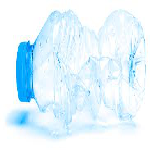

In [88]:
img = img.resize((150, 150), Image.NEAREST)
img

In [89]:
X = preprocessor.from_url(url)

In [90]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [91]:
dict(zip(classes, preds[0]))

{'cardboard': -1.9271576,
 'glass': 1.1379632,
 'metal': -1.9984252,
 'paper': -2.912353,
 'plastic': 7.8411026,
 'trash': -0.96828276}

In [92]:
preprocessor = create_preprocessor('xception', target_size=(150, 150))
#url = 'https://images.kkeu.de/is/image/BEG/Packaging_Supplies/Cardboard_boxes/Folding_cardboard_box_FEFCO_0201_pdplarge-mrd--000026508745_PRD_org_all.jpg'
#url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJm0EULF8I8upx-gcOQQ6OgEMb0Wy5q3pc7g&usqp=CAU'
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSXiQMh90X7I5lRslSReaFY0RCvGU-jMPAnsA&usqp=CAU'

In [93]:
with urlopen(url) as resp:
    buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)

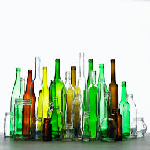

In [94]:
img = img.resize((150, 150), Image.NEAREST)
img

In [95]:
X = preprocessor.from_url(url)

In [96]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [97]:
dict(zip(classes, preds[0]))

{'cardboard': -4.148099,
 'glass': 7.7579646,
 'metal': -1.9670432,
 'paper': -1.6129915,
 'plastic': 1.9732769,
 'trash': -0.77545035}

<h1><b>Test and Train a model using ResNet50V2</b></h1>

In [32]:
def make_model(learning_rate=0.01):
    base_model = tf.keras.applications.ResNet50V2(include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = True
    
    ##############################################
    
    inputs = keras.Input(shape=(150, 150, 3))

    base = base_model(inputs, training=False)

    vectors = keras.layers.GlobalAveragePooling2D()(base)

    outputs = keras.layers.Dense(6)(vectors)

    model = keras.Model(inputs, outputs)
    
    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [33]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_ds = train_gen.flow_from_directory('./Garbage classification/train/',target_size=(150, 150), batch_size=32)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('./Garbage classification/validation',target_size=(150, 150), batch_size=32, shuffle=False)


Found 2019 images belonging to 6 classes.
Found 508 images belonging to 6 classes.


In [34]:
scores={}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
94674944/94668760 [==============================] - 67s 1us/step
Epoch 1/10
64/64 [==============================] - 1147s 18s/step - loss: 1.3309 - accuracy: 0.5149 - val_loss: 0.7582 - val_accuracy: 0.7461
Epoch 2/10
64/64 [==============================] - 1179s 18s/step - loss: 0.4143 - accuracy: 0.8768 - val_loss: 0.8590 - val_accuracy: 0.7165
Epoch 3/10
64/64 [==============================] - 1181s 18s/step - loss: 0.2658 - accuracy: 0.9127 - val_loss: 1.0233 - val_accuracy: 0.7382
Epoch 4/10
64/64 [==============================] - 1229s 19s/step - loss: 0.1409 - accuracy: 0.9500 - val_loss: 0.9253 - val_accuracy: 0.7421
Epoch 5/10
64/64 [==============================] - 1235s 19s/step - loss: 0.1330 - accuracy: 0.9438 - val_loss: 0.7063 - val_accuracy: 0.7835
Epoch 6/10
64/64 [==============================] - 1164s 18s/step - loss: 0.0667 - accuracy: 0.9812 - val_loss: 0.7842 - val_accuracy: 0.8307
Epoch 7/10
64/64 [==============================] - 1242s 19s/step - 

KeyboardInterrupt: 

End manually, learning rate = 0.0001 good, but for greater values not good

We can have a try with learning rate = 0.0001 and add a dense layer of some size ...

In [8]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = tf.keras.applications.ResNet50V2(include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = True
    
    ##############################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(6)(inner)
    model = keras.Model(inputs, outputs)
    
    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy']
    )
    
    return model

In [9]:
learning_rate = 0.0001

scores={}

for size in [10, 100, 1000]:
    print(size)
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()

10


2022-01-21 09:21:31.090524: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-21 09:21:31.111472: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3065950000 Hz


Epoch 1/10
64/64 [==============================] - 1334s 21s/step - loss: 1.6179 - accuracy: 0.3087 - val_loss: 1.1770 - val_accuracy: 0.5591
Epoch 2/10
64/64 [==============================] - 1371s 21s/step - loss: 1.0828 - accuracy: 0.5936 - val_loss: 1.1076 - val_accuracy: 0.5571
Epoch 3/10
64/64 [==============================] - 1419s 22s/step - loss: 0.9030 - accuracy: 0.6524 - val_loss: 1.0507 - val_accuracy: 0.6201
Epoch 4/10
64/64 [==============================] - 1337s 21s/step - loss: 0.6951 - accuracy: 0.7243 - val_loss: 0.9333 - val_accuracy: 0.6378
Epoch 5/10
64/64 [==============================] - 1283s 20s/step - loss: 0.6729 - accuracy: 0.7253 - val_loss: 0.8982 - val_accuracy: 0.6732
Epoch 6/10
64/64 [==============================] - 1337s 21s/step - loss: 0.6006 - accuracy: 0.7598 - val_loss: 1.1032 - val_accuracy: 0.6437
Epoch 7/10
38/64 [================>.............] - ETA: 8:45 - loss: 0.5725 - accuracy: 0.7302

KeyboardInterrupt: 

End manually, size = 10 not good, try with 100

In [15]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = tf.keras.applications.ResNet50V2(include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = True
    
    ##############################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(6)(inner)
    model = keras.Model(inputs, outputs)
    
    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy']
    )
    
    return model

In [16]:
learning_rate = 0.0001

scores={}

for size in [100, 1000]:
    print(size)
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()

100
Epoch 1/10
64/64 [==============================] - 1377s 21s/step - loss: 1.3154 - accuracy: 0.5133 - val_loss: 0.7099 - val_accuracy: 0.7598
Epoch 2/10
64/64 [==============================] - 1351s 21s/step - loss: 0.4083 - accuracy: 0.8612 - val_loss: 0.7331 - val_accuracy: 0.7756
Epoch 3/10
64/64 [==============================] - 1351s 21s/step - loss: 0.2259 - accuracy: 0.9296 - val_loss: 0.8651 - val_accuracy: 0.7618
Epoch 4/10
64/64 [==============================] - 1328s 21s/step - loss: 0.1967 - accuracy: 0.9302 - val_loss: 0.8523 - val_accuracy: 0.7756
Epoch 5/10
64/64 [==============================] - 1401s 22s/step - loss: 0.1050 - accuracy: 0.9682 - val_loss: 0.9337 - val_accuracy: 0.7303
Epoch 6/10
64/64 [==============================] - 1296s 20s/step - loss: 0.0983 - accuracy: 0.9701 - val_loss: 0.7943 - val_accuracy: 0.7972
Epoch 7/10
64/64 [==============================] - 1258s 20s/step - loss: 0.0610 - accuracy: 0.9820 - val_loss: 0.8816 - val_accuracy: 0.

KeyboardInterrupt: 

End manually, no improvements with a further dense layer.
Try with one dense layer only and with dropout regularization

In [6]:
def make_model(learning_rate=0.01, droprate=0.5):
    base_model = tf.keras.applications.ResNet50V2(include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = True
    
    ##############################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    
    drop = keras.layers.Dropout(droprate)(vectors)
    
    outputs = keras.layers.Dense(6)(drop)
    model = keras.Model(inputs, outputs)
    
    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy']
    )
    
    return model

In [7]:
learning_rate = 0.0001

scores={}

for droprate in [0.2, 0.5]:
    print(droprate)
    model = make_model(learning_rate=learning_rate, droprate=droprate)
    history = model.fit(train_ds, epochs=20, validation_data=val_ds)
    scores[droprate] = history.history
    
    print()
    print()

0.2


2022-01-22 11:45:33.116139: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-22 11:45:33.116509: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-22 11:45:33.139125: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-01-22 11:45:38.461715: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-22 11:45:38.499348: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3065950000 Hz


Epoch 1/20
64/64 [==============================] - 1369s 21s/step - loss: 1.5742 - accuracy: 0.4499 - val_loss: 0.9252 - val_accuracy: 0.6535
Epoch 2/20
64/64 [==============================] - 1398s 22s/step - loss: 0.5525 - accuracy: 0.8094 - val_loss: 0.7761 - val_accuracy: 0.7618
Epoch 3/20
64/64 [==============================] - 1394s 22s/step - loss: 0.2838 - accuracy: 0.9012 - val_loss: 0.8236 - val_accuracy: 0.7657
Epoch 4/20
64/64 [==============================] - 1411s 22s/step - loss: 0.1434 - accuracy: 0.9489 - val_loss: 0.9431 - val_accuracy: 0.7382
Epoch 5/20
64/64 [==============================] - 1245s 19s/step - loss: 0.1656 - accuracy: 0.9437 - val_loss: 1.2038 - val_accuracy: 0.7264
Epoch 6/20
64/64 [==============================] - 1368s 21s/step - loss: 0.1163 - accuracy: 0.9631 - val_loss: 0.9849 - val_accuracy: 0.7776
Epoch 7/20
64/64 [==============================] - 1357s 21s/step - loss: 0.1028 - accuracy: 0.9682 - val_loss: 0.9851 - val_accuracy: 0.7933

KeyboardInterrupt: 

End manually, no improvements with a dropout regularization.
Try with data augmentation

In [12]:
def make_model(learning_rate=0.01):
    base_model = tf.keras.applications.ResNet50V2(include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = True
    
    ##############################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    outputs = keras.layers.Dense(6)(vectors)
    model = keras.Model(inputs, outputs)
    
    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy']
    )
    
    return model

In [13]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

train_ds = train_gen.flow_from_directory('./Garbage classification/train/',target_size=(150, 150), batch_size=32)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('./Garbage classification/validation',target_size=(150, 150), batch_size=32, shuffle=False)

checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v3_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

Found 2019 images belonging to 6 classes.
Found 508 images belonging to 6 classes.


In [14]:
learning_rate = 0.0001


model = make_model(
    learning_rate=learning_rate,
)

history = model.fit(train_ds, epochs=15, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/15
64/64 [==============================] - 1373s 21s/step - loss: 1.3213 - accuracy: 0.5342 - val_loss: 0.7679 - val_accuracy: 0.7362
Epoch 2/15
64/64 [==============================] - 1258s 20s/step - loss: 0.6432 - accuracy: 0.7728 - val_loss: 0.6675 - val_accuracy: 0.7579
Epoch 3/15
64/64 [==============================] - 1409s 22s/step - loss: 0.4789 - accuracy: 0.8184 - val_loss: 0.7868 - val_accuracy: 0.7756
Epoch 4/15
64/64 [==============================] - 1341s 21s/step - loss: 0.3768 - accuracy: 0.8709 - val_loss: 0.6722 - val_accuracy: 0.7992
Epoch 5/15
64/64 [==============================] - 1414s 22s/step - loss: 0.3007 - accuracy: 0.8946 - val_loss: 0.6969 - val_accuracy: 0.8130
Epoch 6/15
64/64 [==============================] - 1329s 21s/step - loss: 0.2662 - accuracy: 0.9164 - val_loss: 0.7731 - val_accuracy: 0.7736
Epoch 7/15
64/64 [==============================] - 1432s 22s/step - loss: 0.2273 - accuracy: 0.9189 - val_loss: 0.6729 - val_accuracy: 0.8091

0.8465 is the best result in accuracy, but it takes 283mb instead of the Xception (86mb)
For this small accuracy, and for this project I prefer using the previous model